___
# PROJETO 2

## Bruno Xavier Gomes
___

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Usuario\Anaconda3\Scripts


In [27]:
dados = pd.read_excel("C:\\Users\\Usuario\\Documents\\Insper\\C.D\\DP\\aula15\\Life.xlsx")

In [33]:
dados = dados.dropna(subset = ['A1940', 'A1970', 'A2010'])

In [43]:
df = pd.DataFrame()

___
## Seleção dos três anos com diferentes formatos de distribuição da expectativa de vida

In [104]:
df['a1888'] = sorted(dados.A1888)
df['a1939'] = sorted(dados.A1939)
df['a2010'] = sorted(dados.A2010)

___
### Análise Descritiva

In [105]:
d1 = df.a1888.describe()
d2 = df.a1939.describe()
d3 = df.a2010.describe()

print('Describe (1888):\n', d1, '\n\nDescribe (1939):\n', d2, '\n\nDescribe (2010):\n', d3)

Describe (1888):
 count    201.000000
mean      32.529872
std        5.564969
min       17.000000
25%       29.200000
50%       32.000000
75%       35.000000
max       52.350000
Name: a1888, dtype: float64 

Describe (1939):
 count    201.000000
mean      40.912561
std       10.958901
min       23.387000
25%       31.900000
50%       37.500000
75%       48.894769
max       67.730000
Name: a1939, dtype: float64 

Describe (2010):
 count    201.000000
mean      70.807920
std        8.697194
min       37.000000
25%       64.500000
50%       73.400000
75%       77.600000
max       83.000000
Name: a2010, dtype: float64


In [107]:
k = 14
a = (83 - 17)/k

faixa = np.arange(17, 83, a)

(0, 0.1)

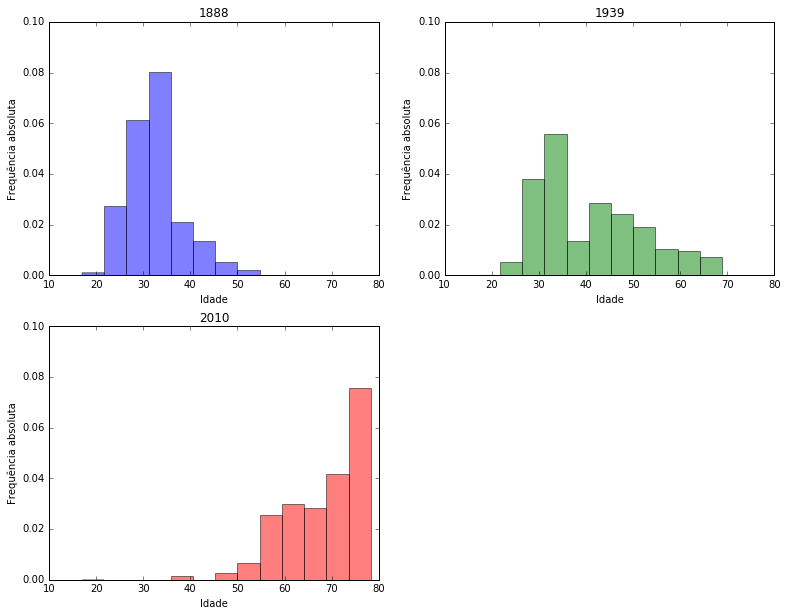

In [108]:
fig = plt.figure(figsize = (13, 10))

plt.subplot(221)
plot = df.a1888.plot.hist(bins = faixa, title = '1888', figsize = (13, 10), alpha = 0.5, color = 'b', normed = 1)
plt.ylabel('Frequência absoluta')
plt.xlabel('Idade')
plt.ylim(0, 0.1)

plt.subplot(222)
plot = df.a1939.plot.hist(bins = faixa, title = '1939', figsize = (13, 10), alpha = 0.5, color = 'g', normed = 1)
plt.ylabel('Frequência absoluta')
plt.xlabel('Idade')
plt.ylim(0, 0.1)

plt.subplot(223)
plot = df.a2010.plot.hist(bins = faixa, title = '2010', figsize = (13, 10), alpha = 0.5, color = 'r', normed = 1)
plt.ylabel('Frequência absoluta')
plt.xlabel('Idade')
plt.ylim(0, 0.1)

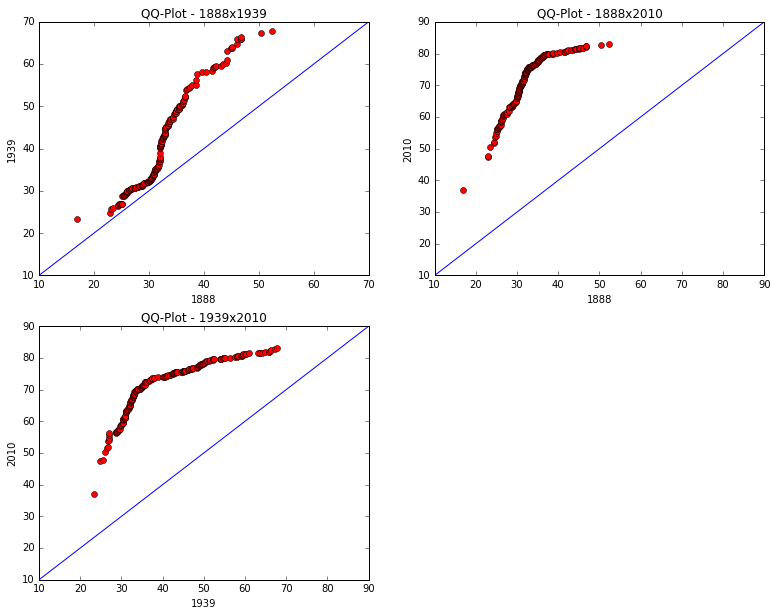

In [120]:
fig = plt.figure(figsize = (13, 10))

plt.subplot(221)
plt.plot(df.a1888, df.a1939, 'ro')
plt.plot((10, 70), (10, 70))
plt.title('QQ-Plot - 1888x1939')
plt.xlabel('1888')
plt.ylabel('1939')

plt.subplot(222)
plt.plot(df.a1888, df.a2010, 'ro')
plt.plot((10, 90), (10, 90))
plt.title('QQ-Plot - 1888x2010')
plt.xlabel('1888')
plt.ylabel('2010')

plt.subplot(223)
plt.plot(df.a1939, df.a2010, 'ro')
plt.plot((10, 90), (10, 90))
plt.title('QQ-Plot - 1939x2010')
plt.xlabel('1939')
plt.ylabel('2010')

### Aderência de um modelo probabilístico normal aos dados

In [122]:
mu1 = df.a1888.mean()
mu2 = df.a1939.mean()
mu3 = df.a2010.mean()

sigma1 = (df.a1888.var())**0.5
sigma2 = (df.a1939.var())**0.5
sigma3 = (df.a2010.var())**0.5

(0, 0.1)

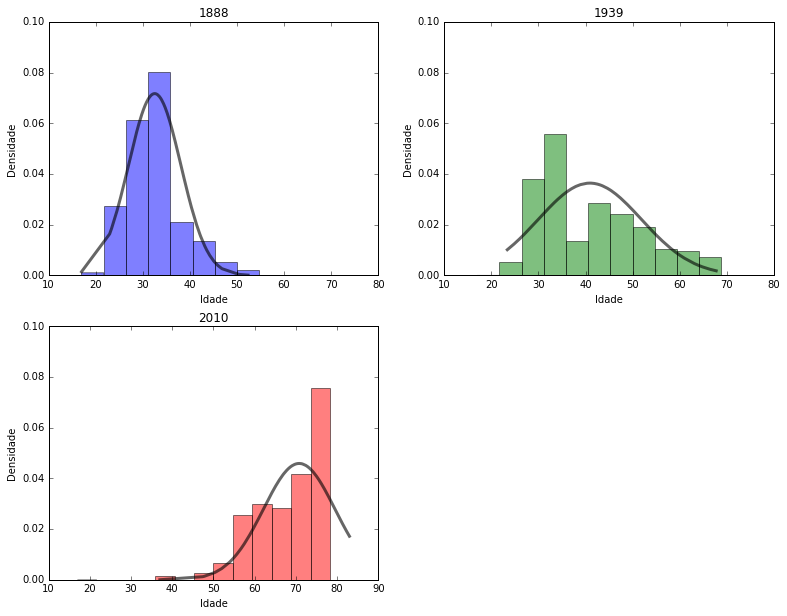

In [124]:
fig = plt.figure(figsize = (13, 10))

plt.subplot(221)
plot = df.a1888.plot.hist(bins = faixa, title = '1888', figsize = (13, 10), alpha = 0.5, color = 'b', normed = 1)
plt.plot(df.a1888, stats.norm.pdf(df.a1888, loc = mu1, scale = sigma1), lw = 3, alpha = 0.6, color = 'black')
plt.ylabel('Densidade')
plt.xlabel('Idade')
plt.ylim(0, 0.1)

plt.subplot(222)
plot = df.a1939.plot.hist(bins = faixa, title = '1939', figsize = (13, 10), alpha = 0.5, color = 'g', normed = 1)
plt.plot(df.a1939, stats.norm.pdf(df.a1939, loc = mu2, scale = sigma2), lw = 3, alpha = 0.6, color = 'black')
plt.ylabel('Densidade')
plt.xlabel('Idade')
plt.ylim(0, 0.1)

plt.subplot(223)
plot = df.a2010.plot.hist(bins = faixa, title = '2010', figsize = (13, 10), alpha = 0.5, color = 'r', normed = 1)
plt.plot(df.a2010, stats.norm.pdf(df.a2010, loc = mu3, scale = sigma3), lw = 3, alpha = 0.6, color = 'black')
plt.ylabel('Densidade')
plt.xlabel('Idade')
plt.ylim(0, 0.1)

___
### Aderência de um modelo probabilístico assimétrico aos dados

___
### Cálculo de probabilidades a partir da distribuição normal